In [1]:
# CNN으로 학습 및 평가

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/KCC 3기 Colab Home/data/cat_dog_full/train.csv')
df.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,6360,6361,6362,6363,6364,6365,6366,6367,6368,6369,6370,6371,6372,6373,6374,6375,6376,6377,6378,6379,6380,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0,99,97,100,93,86,93,98,103,104,103,111,111,116,125,130,133,139,154,164,184,94,78,114,166,174,178,174,170,175,179,178,159,125,179,184,188,141,117,142,...,86,91,87,89,90,95,89,85,88,89,88,87,84,84,89,84,85,88,83,84,79,83,81,81,75,75,74,73,64,68,74,66,64,74,59,50,49,55,41,36
1,0,106,96,95,96,96,94,91,92,92,89,89,91,86,88,90,81,86,77,76,76,76,73,77,74,74,74,74,74,72,71,68,64,63,111,133,120,121,125,116,...,252,253,253,253,253,253,253,253,253,254,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,254,254
2,0,183,182,179,181,185,183,181,185,181,182,182,182,180,181,178,178,182,181,182,182,180,185,179,178,182,179,182,188,181,181,184,183,183,186,182,186,179,185,182,...,55,37,59,52,58,41,46,52,52,72,76,80,86,77,77,68,59,45,23,31,20,14,27,36,32,21,12,9,17,22,20,27,24,28,23,37,30,32,39,27
3,1,66,70,91,91,90,88,82,68,91,79,77,87,100,88,43,91,108,83,80,68,65,68,64,67,65,79,62,83,70,69,76,92,84,43,60,59,76,72,68,...,110,138,131,115,102,87,109,96,45,97,88,84,107,101,133,89,119,135,127,102,71,84,22,67,41,77,48,91,72,99,89,88,96,106,52,74,55,84,91,100
4,0,119,119,122,122,123,121,120,120,120,120,120,120,120,120,120,119,121,119,119,126,127,129,131,132,133,133,135,134,136,135,135,137,137,138,138,138,139,140,139,...,109,109,100,97,100,113,104,84,88,138,140,123,136,141,140,140,140,140,139,138,138,135,135,134,133,130,129,129,128,126,124,122,120,118,115,110,107,103,94,78


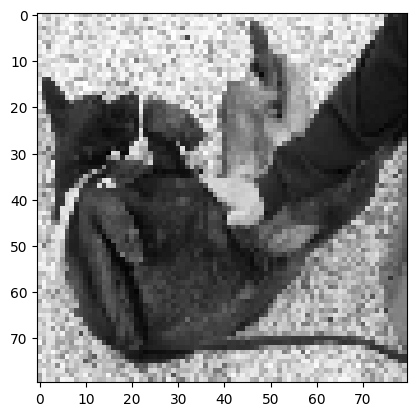

In [3]:
# 이미지 확인
img_data = df.drop('label', axis=1, inplace=False).values[150].reshape(80, 80)
plt.imshow(img_data, cmap='gray')
plt.show()

In [12]:
# 데이터 분리

x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False).values,
                 df['label'].values.reshape(-1,1),
                 test_size=0.3,
                 random_state=42)

scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

In [19]:
# model 구현

model = Sequential()

# Feature Extraction (Convolution, Pooling)
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(80,80,1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))

# FC layer
model.add(Flatten()) # input 역할

# Dropout
model.add(Dropout(0.5))

# Hidden layer
model.add(Dense(256,
                activation='relu'))

# Output layer
model.add(Dense(1,
                activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 80, 80, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 128)      

In [20]:
# model 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model 학습
model_result = model.fit(x_data_train_norm.reshape(-1,80,80,1),
                         t_data_train,
                         epochs=100,
                         batch_size=100,
                         verbose=1,
                         validation_split=0.3)

Epoch 1/100
123/123 [==============================] - 6s 42ms/step - loss: 0.6865 - accuracy: 0.5442 - val_loss: 0.6810 - val_accuracy: 0.5598
Epoch 2/100
123/123 [==============================] - 5s 39ms/step - loss: 0.6236 - accuracy: 0.6523 - val_loss: 0.5931 - val_accuracy: 0.6775
Epoch 3/100
123/123 [==============================] - 5s 38ms/step - loss: 0.5831 - accuracy: 0.6879 - val_loss: 0.5713 - val_accuracy: 0.6983
Epoch 4/100
123/123 [==============================] - 5s 39ms/step - loss: 0.5434 - accuracy: 0.7253 - val_loss: 0.5068 - val_accuracy: 0.7512
Epoch 5/100
123/123 [==============================] - 5s 40ms/step - loss: 0.5037 - accuracy: 0.7506 - val_loss: 0.5028 - val_accuracy: 0.7562
Epoch 6/100
123/123 [==============================] - 5s 39ms/step - loss: 0.4728 - accuracy: 0.7733 - val_loss: 0.4649 - val_accuracy: 0.7783
Epoch 7/100
123/123 [==============================] - 5s 40ms/step - loss: 0.4511 - accuracy: 0.7856 - val_loss: 0.4417 - val_accuracy:

In [21]:
# model 평가
model.evaluate(x_data_test_norm.reshape(-1,80,80,1), t_data_test)

235/235 [==============================] - 1s 6ms/step - loss: 0.8349 - accuracy: 0.8584


[0.8348707556724548, 0.8583999872207642]

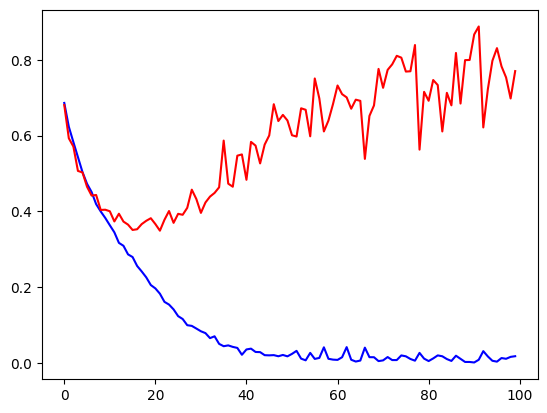

In [22]:
# history 객체를 그래프로 나타내기

plt.plot(model_result.history['loss'], color='b')
plt.plot(model_result.history['val_loss'], color='r')
plt.show()